In [ ]:
from google.colab import drive
import pandas as pd
import os

drive.mount('/content/drive',force_remount=True)
folder_path = './drive/MyDrive/Colab Notebooks/CS410/data/game_rvw_csvs/'
save_path = './drive/MyDrive/Colab Notebooks/CS410/data/processed_data/'

Mounted at /content/drive


In [ ]:
# Function to balance the dataset with a maximum 10% difference between categories
def balance_dataset(dataset, column_name='voted_up'):
    positive_reviews = dataset[dataset[column_name] == True]
    print()
    negative_reviews = dataset[dataset[column_name] == False]

    # Calculate the target size for the larger category
    max_allowed_difference = 0.1  # 10%
    smaller_size = min(len(positive_reviews), len(negative_reviews))
    larger_size_target = int(smaller_size / (1 - max_allowed_difference))

    # Reduce the larger category to the target size
    if len(positive_reviews) > len(negative_reviews):
        positive_reviews = positive_reviews.sample(n=larger_size_target, random_state=1)
    else:
        negative_reviews = negative_reviews.sample(n=larger_size_target, random_state=1)

    # Combine and shuffle the balanced dataset
    balanced_dataset = pd.concat([positive_reviews, negative_reviews])
    return balanced_dataset

In [ ]:
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)

        # Read the CSV file
        data = pd.read_csv(file_path)

        # Balance the dataset
        balanced_data = balance_dataset(data)

        # Save the balanced dataset to a new file
        balanced_file_path = os.path.join(save_path, f'balanced_{filename}')
        balanced_data.to_csv(balanced_file_path, index=False)
        print(f"{filename} processed")


322330_DontStarveTogether.csv processed

49520_Borderlands2.csv processed

367520_HollowKnight.csv processed

286160_TabletopSimulator.csv processed

314160_MicrosoftFlightSimulatorXSteamEdition.csv processed

262060_DarkestDungeon.csv processed

244450_MenofWarAssaultSquad2.csv processed

48700_MountBladeWarband.csv processed

359550_TomClancysRainbowSixSiege.csv processed

1097150_FallGuys.csv processed

582660_BlackDesertOnline.csv processed

239140_DyingLight.csv processed

552520_FarCry5.csv processed

418460_RisingStorm2Vietnam.csv processed

1100620_FootballManager2020Touch.csv processed

812140_AssassinsCreedOdyssey.csv processed

1030840_MafiaDefinitiveEdition.csv processed

1113000_Persona4Golden.csv processed

552500_WarhammerVermintide2.csv processed

251570_7DaystoDie.csv processed

47890_TheSims3.csv processed

573090_StormworksBuildandRescue.csv processed

306130_TheElderScrollsOnline.csv processed

4700_TotalWarMEDIEVALIIDefinitiveEdition.csv processed

412020_MetroExo

In [ ]:
results = []

for filename in os.listdir(save_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(save_path, filename)

        # Read the CSV file
        data = pd.read_csv(file_path)
        print(f'Processing {filename}')
        # Get the value counts of TRUE and FALSE values
        value_counts = data['voted_up'].value_counts()

        # Initialize counts
        true_count = value_counts.get(True, 0)
        false_count = value_counts.get(False, 0)

        # Calculate the percentages
        total = true_count + false_count
        true_percentage = (true_count / total)  if total > 0 else 0
        false_percentage = (false_count / total) if total > 0 else 0
        difference = abs(true_percentage - false_percentage) * 100  # Percentage difference

        # Return the results
        results.append( {
            'file_name': os.path.basename(file_path),
            'TRUE': true_percentage,
            'FALSE': false_percentage,
            'difference': difference,
            'number_of_rows': total
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)


# Save the analysis results to a new CSV file
analysis_csv_path = './drive/MyDrive/Colab Notebooks/CS410/data/analysis_results.csv'
results_df.to_csv(analysis_csv_path, index=False)

Processing balanced_322330_DontStarveTogether.csv
Processing balanced_49520_Borderlands2.csv
Processing balanced_286160_TabletopSimulator.csv
Processing balanced_367520_HollowKnight.csv
Processing balanced_314160_MicrosoftFlightSimulatorXSteamEdition.csv
Processing balanced_48700_MountBladeWarband.csv
Processing balanced_262060_DarkestDungeon.csv
Processing balanced_244450_MenofWarAssaultSquad2.csv
Processing balanced_359550_TomClancysRainbowSixSiege.csv
Processing balanced_1097150_FallGuys.csv
Processing balanced_582660_BlackDesertOnline.csv
Processing balanced_239140_DyingLight.csv
Processing balanced_418460_RisingStorm2Vietnam.csv
Processing balanced_1030840_MafiaDefinitiveEdition.csv
Processing balanced_1100620_FootballManager2020Touch.csv
Processing balanced_812140_AssassinsCreedOdyssey.csv
Processing balanced_552520_FarCry5.csv
Processing balanced_1113000_Persona4Golden.csv
Processing balanced_552500_WarhammerVermintide2.csv
Processing balanced_573090_StormworksBuildandRescue.csv

<Figure size 1000x600 with 0 Axes>

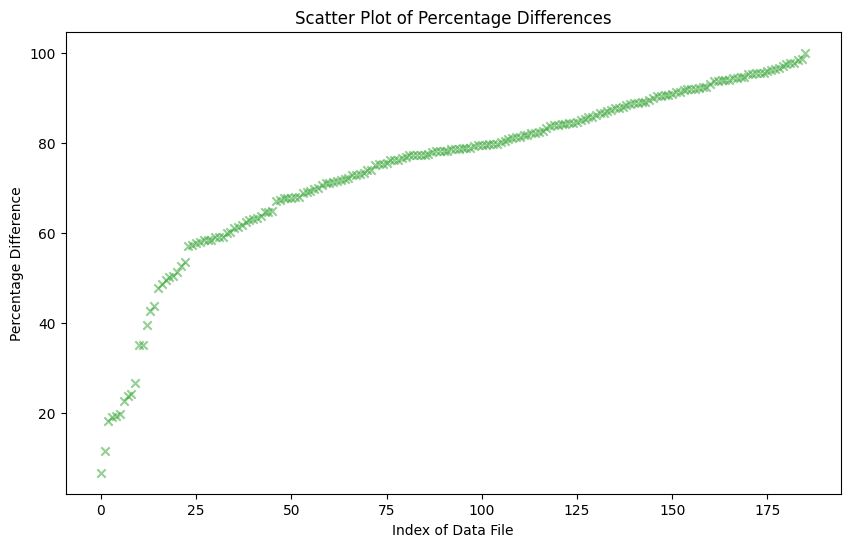

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = './drive/MyDrive/Colab Notebooks/CS410/data/balanced_data_results.csv'

df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['differences'], alpha=0.5, c='C2', marker='x')

plt.title('Scatter Plot of Percentage Differences')
plt.xlabel('Index of Data File')
plt.ylabel('Percentage Difference')

plt.show()

<Figure size 1000x600 with 0 Axes>

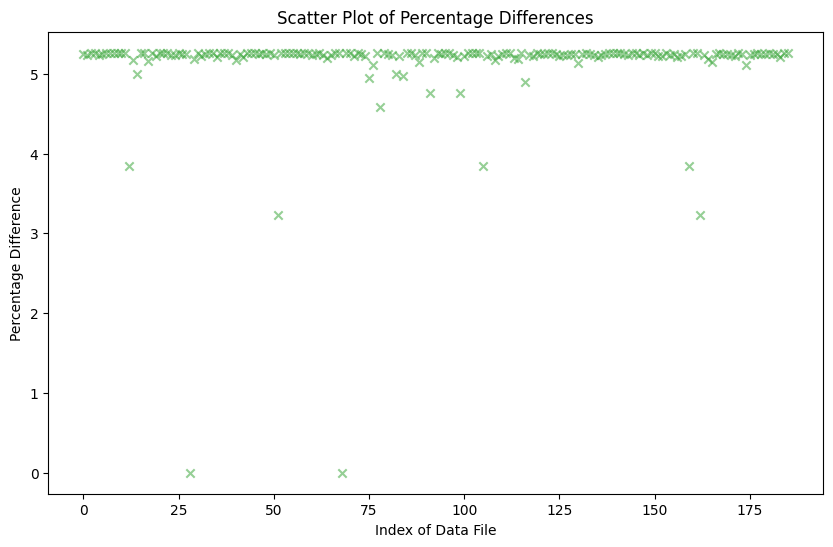

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.scatter(results_df.index, results_df['difference'], alpha=0.5, c='C2', marker='x')

plt.title('Scatter Plot of Percentage Differences')
plt.xlabel('Index of Data File')
plt.ylabel('Percentage Difference')

plt.show()
